# Name: Nick Lavigne

# Description: The code below was an attempt to look at fantasy baseball more holistically. Too often fantasy baseball is looked at as individual statistical achievements, but in order for those players to perform their teammates must as well. For this reason it was decided to create an average player for each position and compare each team's positional player to that average player. Right fielders would only be compared with the average right fielder and so on and so forth. At the end a visual will be created in order to clearly see how each player on each team stacked up to the defined average. 

#Statistic Citation: Sports Reference LLC. "2022 Major League Baseball Standard Batting" Baseball-Reference.com - Major League Statistics and Information. https://www.baseball-reference.com/. (date of your visit)

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats


In [2]:
# read data into dataframe
data = pd.read_csv("/Users/nlavigne/Desktop/Grad School Work/DSE 510/Assignments/Final/2022 MLB Statistics Full .csv")
data

df=pd.DataFrame(data)

df


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,2,21,7,0.246,0.280,64/H9D
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,2,11,1,0.232,0.285,64/H9D
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,0,10,6,0.258,0.276,6/H
3,4,Albert Abreu,26,TOT,AL,1,0,0,0,0,0,0,0,NaN,NaN,1
4,5,Albert Abreu,26,KCR,AL,1,0,0,0,0,0,0,0,NaN,NaN,/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,2,5,3,0.101,0.200,8H/D9
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,2,3,2,0.105,0.209,8H/D9
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,0,0,0,0.250,0.250,/8H
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,0,2,1,0.077,0.143,H


In [3]:
# clean up the Pos column in the dataframe so it just has number and letters
# baseball reference includes a lot of special characters that signify certain games played that won't be needed
df['Pos']=df['Pos'].str.replace(r'[^a-zA-Z0-9\s]+','')


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/476072423.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Pos']=df['Pos'].str.replace(r'[^a-zA-Z0-9\s]+','')


In [4]:
# get rid of pitchers in the dataframe because we will only be looking at hitters. 
position_player = df[df['Pos'].str[0] != '1']
position_player

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,2,21,7,0.246,0.280,64H9D
1,2,CJ Abrams*,21,SDP,NL,46,139,125,16,29,2,11,1,0.232,0.285,64H9D
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,0,10,6,0.258,0.276,6H
5,6,José Abreu,35,CHW,AL,157,679,601,85,183,15,75,0,0.304,0.378,3D
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,15,50,29,0.266,0.351,9DH8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,Bradley Zimmer*,29,TOT,AL,100,101,89,14,9,2,5,3,0.101,0.200,8HD9
988,989,Bradley Zimmer*,29,TOR,AL,77,87,76,11,8,2,3,2,0.105,0.209,8HD9
989,990,Bradley Zimmer*,29,PHI,NL,9,16,16,4,4,0,0,0,0.250,0.250,8H
990,991,Bradley Zimmer*,29,TOR,AL,23,14,13,3,1,0,2,1,0.077,0.143,H


In [5]:
# get the average plate appearances for an MLB player in order to create a minimum PA
position_player['PA'].mean()

232.39700805523591

In [6]:
# limit the dataframe to only players who had more than the average amount of PA
ab_min = df[df['PA'] >= 233]
# set a different limit of PA for catchers since they typically have fewer. Use rookie definition for this.
ab_min_for_c = df[df['AB'] >= 130]

ab_min_for_c

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,2,21,7,0.246,0.280,64H9D
2,3,CJ Abrams*,21,WSN,NL,44,163,159,17,41,0,10,6,0.258,0.276,6H
5,6,José Abreu,35,CHW,AL,157,679,601,85,183,15,75,0,0.304,0.378,3D
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,15,50,29,0.266,0.351,9DH8
7,8,Willy Adames,26,MIL,NL,139,617,563,83,134,31,98,8,0.238,0.298,6DH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,981,Austin Wynns,31,SFG,NL,65,177,162,14,42,3,21,0,0.259,0.313,2DH1
981,982,Mike Yastrzemski*,31,SFG,NL,148,558,485,73,104,17,57,5,0.214,0.305,98HD
982,983,Christian Yelich*,30,MIL,NL,154,671,575,99,145,14,57,19,0.252,0.355,7DH
983,984,Juan Yepez,24,STL,NL,76,274,253,27,64,12,30,0,0.253,0.296,7D935H


In [7]:

ab_min_c1 = ab_min[ab_min['Pos'].str[0] == '2']

ab_min_c1

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
25,26,Jorge Alfaro,29,SDP,NL,82,274,256,25,63,7,40,1,0.246,0.285,2DH
78,79,Joey Bart,25,SFG,NL,97,291,261,34,56,11,25,2,0.215,0.296,2HD
101,102,Christian Bethancourt,30,TOT,AL,100,333,318,39,80,11,34,5,0.252,0.283,23HD15
163,164,Victor Caratini#,28,MIL,NL,95,314,272,26,54,9,34,0,0.199,0.300,2H3D1
203,204,William Contreras,24,ATL,NL,97,376,334,51,93,20,45,2,0.278,0.354,2DH7
204,205,Willson Contreras,30,CHC,NL,113,487,416,65,101,22,55,4,0.243,0.349,2DH
216,217,Travis d'Arnaud,33,ATL,NL,107,426,396,61,106,18,60,0,0.268,0.319,2DH
239,240,Elias Díaz,31,COL,NL,105,381,351,29,80,9,51,0,0.228,0.281,2H
304,305,Nick Fortes,25,MIA,NL,72,240,217,41,50,9,24,5,0.230,0.304,2DH3
344,345,Yan Gomes,34,CHC,NL,86,293,277,23,65,8,31,2,0.235,0.260,2DH


In [8]:
# separate out the catchers
ab_min_c = ab_min_for_c[ab_min_for_c['Pos'].str[0] == '2']

ab_min_c

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
8,9,Riley Adams,26,WSN,NL,48,155,142,14,25,5,10,0,0.176,0.245,2HD3
25,26,Jorge Alfaro,29,SDP,NL,82,274,256,25,63,7,40,1,0.246,0.285,2DH
73,74,Austin Barnes,32,LAD,NL,62,212,179,31,38,8,26,2,0.212,0.324,2DH4
78,79,Joey Bart,25,SFG,NL,97,291,261,34,56,11,25,2,0.215,0.296,2HD
101,102,Christian Bethancourt,30,TOT,AL,100,333,318,39,80,11,34,5,0.252,0.283,23HD15
103,104,Christian Bethancourt,30,TBR,AL,44,151,149,16,38,7,15,1,0.255,0.265,23H15D
163,164,Victor Caratini#,28,MIL,NL,95,314,272,26,54,9,34,0,0.199,0.300,2H3D1
168,169,Curt Casali,33,TOT,MLB,57,176,148,20,30,5,17,0,0.203,0.318,23DH
189,190,Robinson Chirinos,38,BAL,AL,67,220,195,10,35,4,22,1,0.179,0.265,2H
203,204,William Contreras,24,ATL,NL,97,376,334,51,93,20,45,2,0.278,0.354,2DH7


In [9]:
# sepearate out the first base position
ab_min_first = ab_min[ab_min['Pos'].str[0] == '3']

ab_min_first

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
5,6,José Abreu,35,CHW,AL,157,679,601,85,183,15,75,0,0.304,0.378,3D
13,14,Jesús Aguilar,32,TOT,MLB,129,507,464,39,109,16,51,1,0.235,0.281,3DH5
14,15,Jesús Aguilar,32,MIA,NL,113,456,415,37,98,15,49,1,0.236,0.286,3DH5
32,33,Pete Alonso,27,NYM,NL,160,685,597,95,162,40,131,5,0.271,0.352,3D
57,58,Luis Arraez*,25,MIN,AL,144,603,547,88,173,8,49,4,0.316,0.375,34DH5
88,89,Josh Bell#,29,TOT,NL,156,647,552,78,147,17,71,0,0.266,0.362,3DH
89,90,Josh Bell#,29,WSN,NL,103,437,375,52,113,14,57,0,0.301,0.384,3
93,94,Brandon Belt*,34,SFG,NL,78,298,254,25,54,8,23,1,0.213,0.326,3DH
131,132,Seth Brown*,29,OAK,AL,150,555,500,55,115,25,73,11,0.230,0.305,3798HD
175,176,Harold Castro*,28,DET,AL,120,443,420,37,114,7,47,0,0.271,0.300,3564HD178


In [10]:
# sepearate out the second base position
ab_min_second = ab_min[ab_min['Pos'].str[0] == '4']

ab_min_second

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
19,20,Ozzie Albies#,25,ATL,NL,64,269,247,36,61,8,35,3,0.247,0.294,4H
33,34,Jose Altuve,32,HOU,AL,141,604,527,103,158,28,57,18,0.300,0.387,4HD
53,54,Orlando Arcia,27,ATL,NL,67,234,209,25,51,9,30,0,0.244,0.316,4D75H16
58,59,Christian Arroyo,27,BOS,AL,87,300,280,32,80,6,36,5,0.286,0.322,49653DH
100,101,Jon Berti,32,MIA,NL,102,404,358,47,86,4,28,41,0.240,0.324,4576H8D
107,108,Cavan Biggio*,27,TOR,AL,97,303,257,43,52,6,24,2,0.202,0.318,43H9D75
177,178,Rodolfo Castro#,23,PIT,NL,71,278,253,25,59,11,27,5,0.233,0.299,456DH
190,191,Jazz Chisholm Jr.*,24,MIA,NL,60,241,213,39,54,14,45,12,0.254,0.325,4H
211,212,Jake Cronenworth*,28,SDP,NL,158,684,587,88,140,17,88,3,0.239,0.332,436HD
250,251,Brendan Donovan*,25,STL,NL,126,468,391,64,110,5,45,2,0.281,0.394,45973DH6


In [11]:
# sepearate out the third base position

ab_min_third = ab_min[ab_min['Pos'].str[0] == '5']

ab_min_third

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
38,39,Brian Anderson,29,MIA,NL,98,383,338,43,75,8,28,1,0.222,0.311,59D7H4
54,55,Nolan Arenado,31,STL,NL,148,620,557,73,163,30,103,5,0.293,0.358,5DH
114,115,Alec Bohm,25,PHI,NL,152,631,586,79,164,13,72,2,0.280,0.315,53DH
126,127,Alex Bregman,28,HOU,AL,155,656,548,93,142,23,93,1,0.259,0.366,5H
153,154,Jeimer Candelario#,28,DET,AL,124,467,429,49,93,13,50,0,0.217,0.272,5DH
187,188,Matt Chapman,29,TOR,AL,155,621,538,83,123,27,76,2,0.229,0.324,5HD
236,237,Rafael Devers*,25,BOS,AL,141,614,555,84,164,27,88,3,0.295,0.358,5DH
243,244,Yandy Díaz,30,TBR,AL,137,558,473,71,140,9,57,3,0.296,0.401,53DH
249,250,Josh Donaldson,36,NYY,AL,132,546,478,59,106,15,62,2,0.222,0.308,5DH
253,254,Brandon Drury,29,TOT,NL,138,568,518,87,136,28,87,2,0.263,0.320,534DH69


In [12]:
# sepearate out the shortstop position
ab_min_ss = ab_min[ab_min['Pos'].str[0] == '6']

ab_min_ss

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
0,1,CJ Abrams*,21,TOT,NL,90,302,284,33,70,2,21,7,0.246,0.280,64H9D
7,8,Willy Adames,26,MIL,NL,139,617,563,83,134,31,98,8,0.238,0.298,6DH
29,30,Nick Allen,23,OAK,AL,100,326,299,31,62,4,19,3,0.207,0.256,64H
39,40,Tim Anderson,29,CHW,AL,79,351,332,50,100,6,25,13,0.301,0.339,6
41,42,Elvis Andrus,33,TOT,AL,149,577,535,66,133,17,58,18,0.249,0.303,6HD
42,43,Elvis Andrus,33,OAK,AL,106,386,354,41,84,8,30,7,0.237,0.301,6HD
66,67,Javier Báez,29,DET,AL,144,590,555,64,132,17,67,9,0.238,0.278,6DH
105,106,Bo Bichette,24,TOR,AL,159,697,652,91,189,24,93,13,0.290,0.333,6DH
113,114,Xander Bogaerts,29,BOS,AL,150,631,557,84,171,15,73,8,0.307,0.377,6DH
174,175,Diego Castillo,24,PIT,NL,96,283,262,28,54,11,29,1,0.206,0.251,649H35D1


In [13]:
# sepearate out the left fielders
ab_min_lf = ab_min[ab_min['Pos'].str[0] == '7']

ab_min_lf

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
9,10,Jo Adell,23,LAA,AL,88,285,268,22,60,8,27,4,0.224,0.264,79HD
56,57,Randy Arozarena,27,TBR,AL,153,645,586,72,154,20,89,32,0.263,0.327,7D9H
95,96,Andrew Benintendi*,27,TOT,AL,126,521,461,54,140,5,51,8,0.304,0.373,7HD
96,97,Andrew Benintendi*,27,KCR,AL,93,390,347,40,111,3,39,4,0.320,0.387,7HD
154,155,Mark Canha,33,NYM,NL,140,542,462,71,123,13,61,3,0.266,0.367,7H89D35
237,238,Aledmys Díaz,31,HOU,AL,92,327,305,35,74,12,38,1,0.243,0.287,746H5D39
246,247,Corey Dickerson*,33,STL,NL,96,297,281,28,75,6,36,0,0.267,0.300,7DH91
307,308,Jake Fraley*,27,CIN,NL,68,247,216,33,56,12,28,4,0.259,0.344,79DH8
315,316,TJ Friedl*,26,CIN,NL,72,258,225,33,54,8,25,7,0.240,0.314,789HD
319,320,Joey Gallo*,28,TOT,MLB,126,410,350,48,56,19,47,3,0.160,0.280,79HD38


In [14]:
# sepearate out the center fielders
ab_min_cf = ab_min[ab_min['Pos'].str[0] == '8']

ab_min_cf

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
62,63,Harrison Bader,28,TOT,MLB,86,313,292,38,73,5,30,17,0.250,0.294,8H
63,64,Harrison Bader,28,STL,NL,72,264,246,35,63,5,21,15,0.256,0.303,8H
92,93,Cody Bellinger*,26,LAD,NL,144,550,504,70,106,19,68,14,0.210,0.265,8H
111,112,JJ Bleday*,24,MIA,NL,65,238,204,21,34,5,16,4,0.167,0.277,87H9
139,140,Byron Buxton,28,MIN,AL,92,382,340,61,76,28,51,6,0.224,0.306,8DH
164,165,Dylan Carlson#,23,STL,NL,128,488,432,56,102,8,42,5,0.236,0.316,89HD
180,181,Gilberto Celestino,23,MIN,AL,122,347,311,30,74,2,24,4,0.238,0.313,87H9
228,229,Yonathan Daza,28,COL,NL,113,408,372,56,112,2,34,0,0.301,0.349,87H9
229,230,Bryan De La Cruz,25,MIA,NL,115,355,329,38,83,13,43,4,0.252,0.294,897HD
256,257,Mauricio Dubón,27,TOT,MLB,104,265,243,31,52,5,24,2,0.214,0.252,864H759D


In [15]:
# sepearate out the right fielders
ab_min_rf = ab_min[ab_min['Pos'].str[0] == '9']

ab_min_rf

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,15,50,29,0.266,0.351,9DH8
31,32,Albert Almora,28,CIN,NL,64,235,215,26,48,5,29,3,0.223,0.282,987HD
48,49,Aristides Aquino,28,CIN,NL,80,276,259,24,51,10,30,2,0.197,0.246,97H8D
104,105,Mookie Betts,29,LAD,NL,142,639,572,117,154,35,82,12,0.269,0.340,94HD
120,121,Jackie Bradley Jr.*,32,TOT,AL,131,370,344,30,70,4,38,2,0.203,0.255,98H1
121,122,Jackie Bradley Jr.*,32,BOS,AL,91,290,271,21,57,3,29,2,0.210,0.257,98H1
143,144,Kole Calhoun*,34,TEX,AL,125,424,388,36,76,12,49,3,0.196,0.257,97HD8
172,173,Nick Castellanos,30,PHI,NL,136,558,524,56,138,13,62,7,0.263,0.305,9D7H
178,179,Willi Castro#,25,DET,AL,112,392,365,47,88,8,31,9,0.241,0.284,97486H5D
323,324,Adolis García,29,TEX,AL,156,657,605,88,151,27,101,25,0.250,0.300,98DH


In [16]:
# find the average batting average for right fielders
ab_min_rf_BA_avg = ab_min_rf['BA'].mean()*100
ab_min_rf_BA_avg

24.158536585365862

In [17]:
# find the average statistics for right fielders
ab_min_rf_HR_avg = ab_min_rf['HR'].mean()
ab_min_rf_RBI_avg = ab_min_rf['RBI'].mean()
ab_min_rf_SB_avg = ab_min_rf['SB'].mean()
ab_min_rf_R_avg = ab_min_rf['R'].mean()
ab_min_rf_BA_avg = ab_min_rf['BA'].mean()*100
ab_min_rf_OBP_avg = ab_min_rf['OBP'].mean()*100

ab_min_rf_HR_avg
ab_min_rf_RBI_avg
ab_min_rf_SB_avg
ab_min_rf_R_avg

# total up the averages to create comparison number
ab_min_rf_avg_total = ab_min_rf_HR_avg + ab_min_rf_RBI_avg + ab_min_rf_SB_avg + ab_min_rf_R_avg + ab_min_rf_BA_avg + ab_min_rf_OBP_avg
ab_min_rf_avg_total

178.70243902439023

In [18]:
# find the average statistics for center fielders
ab_min_cf_HR_avg = ab_min_cf['HR'].mean()
ab_min_cf_RBI_avg = ab_min_cf['RBI'].mean()
ab_min_cf_SB_avg = ab_min_cf['SB'].mean()
ab_min_cf_R_avg = ab_min_cf['R'].mean()
ab_min_cf_BA_avg = ab_min_cf['BA'].mean()*100
ab_min_cf_OBP_avg = ab_min_cf['OBP'].mean()*100

ab_min_cf_HR_avg
ab_min_cf_RBI_avg
ab_min_cf_SB_avg
ab_min_cf_R_avg

# total up the averages to create comparison number
ab_min_cf_avg_total = ab_min_cf_HR_avg + ab_min_cf_RBI_avg + ab_min_cf_SB_avg + ab_min_cf_R_avg + ab_min_cf_BA_avg + ab_min_cf_OBP_avg
ab_min_cf_avg_total

176.0102564102564

In [19]:
# find the average statistics for left fielders

ab_min_lf_HR_avg = ab_min_lf['HR'].mean()
ab_min_lf_RBI_avg = ab_min_lf['RBI'].mean()
ab_min_lf_SB_avg = ab_min_lf['SB'].mean()
ab_min_lf_R_avg = ab_min_lf['R'].mean()
ab_min_lf_BA_avg = ab_min_lf['BA'].mean()*100
ab_min_lf_OBP_avg = ab_min_lf['OBP'].mean()*100

ab_min_lf_HR_avg
ab_min_lf_RBI_avg
ab_min_lf_SB_avg
ab_min_lf_R_avg

# total up the averages to create comparison number
ab_min_lf_avg_total = ab_min_lf_HR_avg + ab_min_lf_RBI_avg + ab_min_lf_SB_avg + ab_min_lf_R_avg + ab_min_lf_BA_avg + ab_min_lf_OBP_avg
ab_min_cf_avg_total
ab_min_lf_avg_total

169.39166666666665

In [20]:
# find the average statistics for shortstops

ab_min_ss_HR_avg = ab_min_ss['HR'].mean()
ab_min_ss_RBI_avg = ab_min_ss['RBI'].mean()
ab_min_ss_SB_avg = ab_min_ss['SB'].mean()
ab_min_ss_R_avg = ab_min_ss['R'].mean()
ab_min_ss_BA_avg = ab_min_ss['BA'].mean()*100
ab_min_ss_OBP_avg = ab_min_ss['OBP'].mean()*100

ab_min_ss_HR_avg
ab_min_ss_RBI_avg
ab_min_ss_SB_avg
ab_min_ss_R_avg

# total up the averages to create comparison number
ab_min_ss_avg_total = ab_min_ss_HR_avg + ab_min_ss_RBI_avg + ab_min_ss_SB_avg + ab_min_ss_R_avg + ab_min_ss_BA_avg + ab_min_ss_OBP_avg
ab_min_ss_avg_total

195.56285714285718

In [21]:
# find the average statistics for third base

ab_min_third_HR_avg = ab_min_third['HR'].mean()
ab_min_third_RBI_avg = ab_min_third['RBI'].mean()
ab_min_third_SB_avg = ab_min_third['SB'].mean()
ab_min_third_R_avg = ab_min_third['R'].mean()
ab_min_third_BA_avg = ab_min_third['BA'].mean()*100
ab_min_third_OBP_avg = ab_min_third['OBP'].mean()*100

ab_min_third_HR_avg
ab_min_third_RBI_avg
ab_min_third_SB_avg
ab_min_third_R_avg

# total up the averages to create comparison number
ab_min_third_avg_total = ab_min_third_HR_avg + ab_min_third_RBI_avg + ab_min_third_SB_avg + ab_min_third_R_avg + ab_min_third_BA_avg + ab_min_third_OBP_avg

ab_min_third_avg_total

195.71891891891892

In [22]:
# find the average statistics for second base

ab_min_second_HR_avg = ab_min_second['HR'].mean()
ab_min_second_RBI_avg = ab_min_second['RBI'].mean()
ab_min_second_SB_avg = ab_min_second['SB'].mean()
ab_min_second_R_avg = ab_min_second['R'].mean()
ab_min_second_BA_avg = ab_min_second['BA'].mean()*100
ab_min_second_OBP_avg = ab_min_second['OBP'].mean()*100

ab_min_second_HR_avg
ab_min_second_RBI_avg
ab_min_second_SB_avg
ab_min_second_R_avg

# total up the averages to create comparison number
ab_min_second_avg_total = ab_min_second_HR_avg + ab_min_second_RBI_avg + ab_min_second_SB_avg + ab_min_second_R_avg + ab_min_second_BA_avg + ab_min_second_OBP_avg
ab_min_second_avg_total

174.81818181818184

In [23]:
# find the average statistics for first base

ab_min_first_HR_avg = ab_min_first['HR'].mean()
ab_min_first_RBI_avg = ab_min_second['RBI'].mean()
ab_min_first_SB_avg = ab_min_first['SB'].mean()
ab_min_first_R_avg = ab_min_first['R'].mean()
ab_min_first_BA_avg = ab_min_first['BA'].mean()*100
ab_min_first_OBP_avg = ab_min_first['OBP'].mean()*100

ab_min_first_HR_avg
ab_min_first_RBI_avg
ab_min_first_SB_avg
ab_min_first_R_avg


# total up the averages to create comparison number
ab_min_first_avg_total = ab_min_first_HR_avg + ab_min_first_RBI_avg + ab_min_first_SB_avg + ab_min_first_R_avg + ab_min_first_BA_avg + ab_min_first_OBP_avg
ab_min_first_avg_total

176.31719367588934

In [24]:
# find the average statistics for catchers

ab_min_c_HR_avg = ab_min_c['HR'].mean()
ab_min_c_RBI_avg = ab_min_c['RBI'].mean()
ab_min_c_SB_avg = ab_min_c['SB'].mean()
ab_min_c_R_avg = ab_min_c['R'].mean()
ab_min_c_BA_avg = ab_min_c['BA'].mean()*100
ab_min_c_OBP_avg = ab_min_c['OBP'].mean()*100



ab_min_c_HR_avg
ab_min_c_RBI_avg
ab_min_c_SB_avg
ab_min_c_R_avg

# total up the averages to create comparison number
ab_min_c_avg_total = ab_min_c_HR_avg + ab_min_c_RBI_avg + ab_min_c_SB_avg + ab_min_c_R_avg + ab_min_c_BA_avg + ab_min_c_OBP_avg
ab_min_c_avg_total

130.00666666666666

In [25]:
# create a variable for all the averages totaled for each position

ab_min_avg_total_all = (ab_min_rf_avg_total, ab_min_cf_avg_total, ab_min_lf_avg_total, ab_min_ss_avg_total,ab_min_third_avg_total,
                        ab_min_second_avg_total,ab_min_first_avg_total,ab_min_c_avg_total)

ab_min_avg_total_all

(178.70243902439023,
 176.0102564102564,
 169.39166666666665,
 195.56285714285718,
 195.71891891891892,
 174.81818181818184,
 176.31719367588934,
 130.00666666666666)

In [26]:
# group data by team and get all the Atlanta Braves players
braves = ab_min.groupby('Tm').get_group('ATL')
braves

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,15,50,29,0.266,0.351,9DH8
19,20,Ozzie Albies#,25,ATL,NL,64,269,247,36,61,8,35,3,0.247,0.294,4H
53,54,Orlando Arcia,27,ATL,NL,67,234,209,25,51,9,30,0,0.244,0.316,4D75H16
203,204,William Contreras,24,ATL,NL,97,376,334,51,93,20,45,2,0.278,0.354,2DH7
216,217,Travis d'Arnaud,33,ATL,NL,107,426,396,61,106,18,60,0,0.268,0.319,2DH
270,271,Adam Duvall,33,ATL,NL,86,315,287,39,61,12,36,0,0.213,0.276,879H
389,390,Michael Harris II*,21,ATL,NL,114,441,414,75,123,19,64,20,0.297,0.339,8
657,658,Matt Olson*,28,ATL,NL,162,699,616,86,148,34,103,0,0.240,0.325,3
661,662,Marcell Ozuna,31,ATL,NL,124,507,470,56,106,23,56,2,0.226,0.274,D7
755,756,Austin Riley,25,ATL,NL,159,693,615,90,168,38,93,2,0.273,0.349,53H


In [27]:
# clean data up by only displaying the first chracter of the POS column which shows their primary position
braves['Pos'] = braves['Pos'].str.slice(start=0,stop=1)

braves


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/2827802604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  braves['Pos'] = braves['Pos'].str.slice(start=0,stop=1)


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
6,7,Ronald Acuna Jr.,24,ATL,NL,119,533,467,71,124,15,50,29,0.266,0.351,9
19,20,Ozzie Albies#,25,ATL,NL,64,269,247,36,61,8,35,3,0.247,0.294,4
53,54,Orlando Arcia,27,ATL,NL,67,234,209,25,51,9,30,0,0.244,0.316,4
203,204,William Contreras,24,ATL,NL,97,376,334,51,93,20,45,2,0.278,0.354,2
216,217,Travis d'Arnaud,33,ATL,NL,107,426,396,61,106,18,60,0,0.268,0.319,2
270,271,Adam Duvall,33,ATL,NL,86,315,287,39,61,12,36,0,0.213,0.276,8
389,390,Michael Harris II*,21,ATL,NL,114,441,414,75,123,19,64,20,0.297,0.339,8
657,658,Matt Olson*,28,ATL,NL,162,699,616,86,148,34,103,0,0.240,0.325,3
661,662,Marcell Ozuna,31,ATL,NL,124,507,470,56,106,23,56,2,0.226,0.274,D
755,756,Austin Riley,25,ATL,NL,159,693,615,90,168,38,93,2,0.273,0.349,5


In [28]:
# sort data by pos and then sort it by PA to determine which player is the "starter"
braves = braves.sort_values(['Pos', 'PA'])
braves

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
203,204,William Contreras,24,ATL,NL,97,376,334,51,93,20,45,2,0.278,0.354,2
216,217,Travis d'Arnaud,33,ATL,NL,107,426,396,61,106,18,60,0,0.268,0.319,2
657,658,Matt Olson*,28,ATL,NL,162,699,616,86,148,34,103,0,0.240,0.325,3
53,54,Orlando Arcia,27,ATL,NL,67,234,209,25,51,9,30,0,0.244,0.316,4
19,20,Ozzie Albies#,25,ATL,NL,64,269,247,36,61,8,35,3,0.247,0.294,4
755,756,Austin Riley,25,ATL,NL,159,693,615,90,168,38,93,2,0.273,0.349,5
881,882,Dansby Swanson,28,ATL,NL,162,696,640,99,177,25,96,18,0.277,0.329,6
788,789,Eddie Rosario*,30,ATL,NL,80,270,250,27,53,5,24,3,0.212,0.259,7
270,271,Adam Duvall,33,ATL,NL,86,315,287,39,61,12,36,0,0.213,0.276,8
389,390,Michael Harris II*,21,ATL,NL,114,441,414,75,123,19,64,20,0.297,0.339,8


The statistics homeruns, runs, runs batted in, stolen bases, batting average, and on-base% was used because those are traditional statistics used for fantasy baseball purposes. Batting average and OBP was converted into a percentage to make them more meaningful in the total.

In [29]:
# total the stats for each position
braves_rf = braves.iloc[10]['HR']+braves.iloc[10]['R']+braves.iloc[10]['RBI']+braves.iloc[10]['SB']+braves.iloc[10]['BA']*100+braves.iloc[10]['OBP']*100
braves_cf = braves.iloc[9]['HR']+braves.iloc[9]['R']+braves.iloc[9]['RBI']+braves.iloc[9]['SB']+braves.iloc[9]['BA']*100+braves.iloc[9]['OBP']*100
braves_lf = braves.iloc[7]['HR']+braves.iloc[7]['R']+braves.iloc[7]['RBI']+braves.iloc[7]['SB']+braves.iloc[7]['BA']*100+braves.iloc[7]['OBP']*100
braves_ss = braves.iloc[6]['HR']+braves.iloc[6]['R']+braves.iloc[6]['RBI']+braves.iloc[6]['SB']+braves.iloc[6]['BA']*100+braves.iloc[6]['OBP']*100
braves_third = braves.iloc[5]['HR']+braves.iloc[5]['R']+braves.iloc[5]['RBI']+braves.iloc[5]['SB']+braves.iloc[5]['BA']*100+braves.iloc[5]['OBP']*100
braves_second = braves.iloc[4]['HR']+braves.iloc[4]['R']+braves.iloc[4]['RBI']+braves.iloc[4]['SB']+braves.iloc[4]['BA']*100+braves.iloc[4]['OBP']*100
braves_first = braves.iloc[2]['HR']+braves.iloc[2]['R']+braves.iloc[2]['RBI']+braves.iloc[2]['SB']+braves.iloc[2]['BA']*100+braves.iloc[2]['OBP']*100
braves_C = braves.iloc[1]['HR']+braves.iloc[1]['R']+braves.iloc[1]['RBI']+braves.iloc[1]['SB']+braves.iloc[1]['BA']*100+braves.iloc[1]['OBP']*100

# place the total in a variable list
braves_positions = (braves_rf,braves_cf,braves_lf, braves_ss, braves_third, braves_second, braves_first, braves_C)

braves_positions

(226.7,
 241.6,
 106.10000000000001,
 298.59999999999997,
 285.2,
 136.1,
 279.5,
 197.70000000000002)

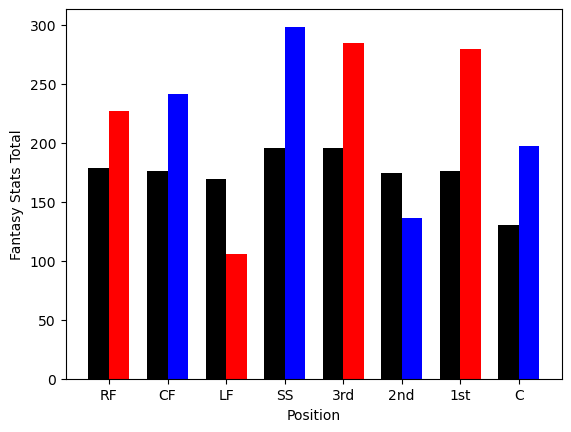

In [30]:
N = 8

# y axis labels
positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)


bar_width = 0.35

colors = ['red','blue','red','blue','red','blue','red','blue']


# create left bar
plt.bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
# create right bag
plt.bar(ind+bar_width, braves_positions, bar_width, color=colors)

# labels
plt.xlabel('Position')
plt.ylabel('Fantasy Stats Total')

plt.xticks(ind + bar_width / 2, (positions))



plt.show()

In [31]:
# separate out red sox players
redsox = ab_min.groupby('Tm').get_group('BOS')
redsox['Pos'] = redsox['Pos'].str.slice(start=0,stop=1)
redsox = redsox.sort_values(['Pos', 'PA'])
redsox


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/1868858931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redsox['Pos'] = redsox['Pos'].str.slice(start=0,stop=1)


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
929,930,Christian Vázquez,31,BOS,AL,84,318,294,33,83,8,42,1,0.282,0.327,2
206,207,Franchy Cordero*,27,BOS,AL,84,275,242,36,53,8,29,4,0.219,0.300,3
217,218,Bobby Dalbec,27,BOS,AL,117,353,317,40,68,12,39,3,0.215,0.283,3
58,59,Christian Arroyo,27,BOS,AL,87,300,280,32,80,6,36,5,0.286,0.322,4
868,869,Trevor Story,29,BOS,AL,94,396,357,53,85,16,66,13,0.238,0.303,4
236,237,Rafael Devers*,25,BOS,AL,141,614,555,84,164,27,88,3,0.295,0.358,5
113,114,Xander Bogaerts,29,BOS,AL,150,631,557,84,171,15,73,8,0.307,0.377,6
700,701,Tommy Pham,34,BOS,AL,53,235,214,32,50,6,24,1,0.234,0.298,7
933,934,Alex Verdugo*,26,BOS,AL,152,644,593,75,166,11,74,1,0.280,0.328,7
410,411,Enrique Hernández,30,BOS,AL,93,402,361,48,80,6,45,0,0.222,0.291,8


In [32]:
# create variables to hold the red sox totals by position
redsox_rf = redsox.iloc[10]['HR']+redsox.iloc[10]['R']+redsox.iloc[10]['RBI']+redsox.iloc[10]['SB']+redsox.iloc[10]['BA']*100+redsox.iloc[10]['OBP']*100
redsox_cf = redsox.iloc[9]['HR']+redsox.iloc[9]['R']+redsox.iloc[9]['RBI']+redsox.iloc[9]['SB']+redsox.iloc[9]['BA']*100+redsox.iloc[9]['OBP']*100
redsox_lf = redsox.iloc[7]['HR']+redsox.iloc[7]['R']+redsox.iloc[7]['RBI']+redsox.iloc[7]['SB']+redsox.iloc[7]['BA']*100+redsox.iloc[7]['OBP']*100
redsox_ss = redsox.iloc[6]['HR']+redsox.iloc[6]['R']+redsox.iloc[6]['RBI']+redsox.iloc[6]['SB']+redsox.iloc[6]['BA']*100+redsox.iloc[6]['OBP']*100
redsox_third = redsox.iloc[5]['HR']+redsox.iloc[5]['R']+redsox.iloc[5]['RBI']+redsox.iloc[5]['SB']+redsox.iloc[5]['BA']*100+redsox.iloc[5]['OBP']*100
redsox_second = redsox.iloc[4]['HR']+redsox.iloc[4]['R']+redsox.iloc[4]['RBI']+redsox.iloc[4]['SB']+redsox.iloc[4]['BA']*100+redsox.iloc[4]['OBP']*100
redsox_first = redsox.iloc[2]['HR']+redsox.iloc[2]['R']+redsox.iloc[2]['RBI']+redsox.iloc[2]['SB']+redsox.iloc[2]['BA']*100+redsox.iloc[2]['OBP']*100
redsox_C = redsox.iloc[1]['HR']+redsox.iloc[1]['R']+redsox.iloc[1]['RBI']+redsox.iloc[1]['SB']+redsox.iloc[1]['BA']*100+redsox.iloc[1]['OBP']*100

redsox_positions = (redsox_rf,redsox_cf,redsox_lf, redsox_ss, redsox_third, redsox_second, redsox_first, redsox_C)

redsox_positions


(101.7,
 150.3,
 116.2,
 248.39999999999998,
 267.3,
 202.10000000000002,
 143.8,
 128.9)

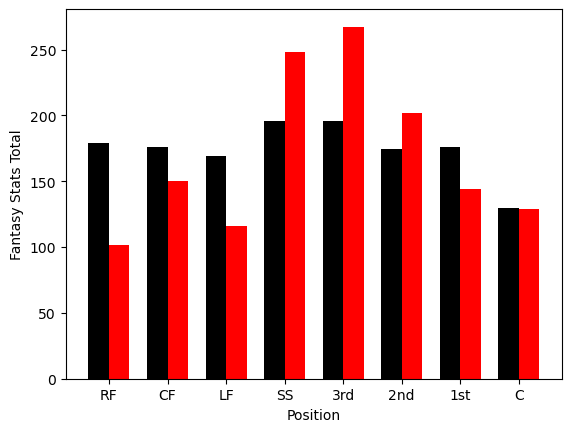

In [33]:
N = 8

positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)


bar_width = 0.35



plt.bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
plt.bar(ind+bar_width, redsox_positions, bar_width, color=['red'])

plt.xlabel('Position')
plt.ylabel('Fantasy Stats Total')

plt.xticks(ind + bar_width / 2, (positions))



plt.show()

In [34]:
nationals = ab_min.groupby('Tm').get_group('WSN')
nationals['Pos'] = nationals['Pos'].str.slice(start=0,stop=1)
nationals = nationals.sort_values(['Pos', 'PA'])
nationals


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/1400291182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationals['Pos'] = nationals['Pos'].str.slice(start=0,stop=1)


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
796,797,Keibert Ruiz#,23,WSN,NL,112,433,394,33,99,7,36,6,0.251,0.313,2
584,585,Joey Meneses,30,WSN,NL,56,240,222,33,72,13,34,1,0.324,0.367,3
89,90,Josh Bell#,29,WSN,NL,103,437,375,52,113,14,57,0,0.301,0.384,3
408,409,César Hernández#,32,WSN,NL,147,617,560,64,139,1,34,10,0.248,0.311,4
309,310,Maikel Franco,29,WSN,NL,103,388,371,31,85,9,39,1,0.229,0.255,5
328,329,Luis García*,22,WSN,NL,93,377,360,29,99,7,45,3,0.275,0.295,6
412,413,Yadiel Hernández*,34,WSN,NL,94,327,305,30,82,9,41,2,0.269,0.312,7
894,895,Lane Thomas,26,WSN,NL,146,548,498,62,120,17,52,8,0.241,0.301,7
768,769,Victor Robles,25,WSN,NL,132,407,366,42,82,6,33,15,0.224,0.273,8
851,852,Juan Soto*,23,WSN,NL,101,436,342,62,84,21,46,6,0.246,0.408,9


In [35]:
nationals_rf = nationals.iloc[9]['HR']+nationals.iloc[9]['R']+nationals.iloc[9]['RBI']+nationals.iloc[9]['SB']+nationals.iloc[9]['BA']*100+nationals.iloc[9]['OBP']*100
nationals_cf = nationals.iloc[8]['HR']+nationals.iloc[8]['R']+nationals.iloc[8]['RBI']+nationals.iloc[8]['SB']+nationals.iloc[8]['BA']*100+nationals.iloc[8]['OBP']*100
nationals_lf = nationals.iloc[7]['HR']+nationals.iloc[7]['R']+nationals.iloc[7]['RBI']+nationals.iloc[7]['SB']+nationals.iloc[7]['BA']*100+nationals.iloc[7]['OBP']*100
nationals_ss = nationals.iloc[5]['HR']+nationals.iloc[5]['R']+nationals.iloc[5]['RBI']+nationals.iloc[5]['SB']+nationals.iloc[5]['BA']*100+nationals.iloc[5]['OBP']*100
nationals_third = nationals.iloc[4]['HR']+nationals.iloc[4]['R']+nationals.iloc[4]['RBI']+nationals.iloc[4]['SB']+nationals.iloc[4]['BA']*100+nationals.iloc[4]['OBP']*100
nationals_second = nationals.iloc[3]['HR']+nationals.iloc[3]['R']+nationals.iloc[3]['RBI']+nationals.iloc[3]['SB']+nationals.iloc[3]['BA']*100+nationals.iloc[3]['OBP']*100
nationals_first = nationals.iloc[2]['HR']+nationals.iloc[2]['R']+nationals.iloc[2]['RBI']+nationals.iloc[2]['SB']+nationals.iloc[2]['BA']*100+nationals.iloc[2]['OBP']*100
nationals_C = nationals.iloc[0]['HR']+nationals.iloc[0]['R']+nationals.iloc[0]['RBI']+nationals.iloc[0]['SB']+nationals.iloc[0]['BA']*100+nationals.iloc[0]['OBP']*100

nationals_positions = (nationals_rf,nationals_cf,nationals_lf, nationals_ss, nationals_third, nationals_second, nationals_first, nationals_C)

nationals_positions


(200.39999999999998,
 145.70000000000002,
 193.2,
 141.0,
 128.4,
 164.9,
 191.5,
 138.4)

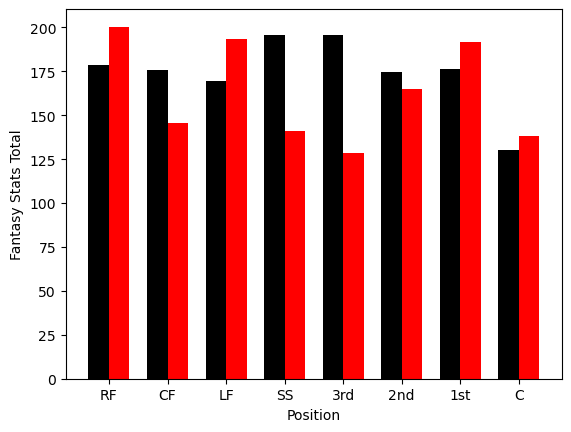

In [36]:
N = 8

positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)

bar_width = 0.35



plt.bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
plt.bar(ind+bar_width, nationals_positions, bar_width, color=['red'])

plt.xlabel('Position')
plt.ylabel('Fantasy Stats Total')

plt.xticks(ind + bar_width / 2, (positions))



plt.show()

In [37]:
marlins = ab_min.groupby('Tm').get_group('MIA')
marlins['Pos'] = marlins['Pos'].str.slice(start=0,stop=1)
marlins = marlins.sort_values(['Pos', 'PA'])
marlins


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/4089354042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marlins['Pos'] = marlins['Pos'].str.slice(start=0,stop=1)


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
304,305,Nick Fortes,25,MIA,NL,72,240,217,41,50,9,24,5,0.230,0.304,2
857,858,Jacob Stallings,32,MIA,NL,114,384,346,25,77,4,34,0,0.223,0.292,2
14,15,Jesús Aguilar,32,MIA,NL,113,456,415,37,98,15,49,1,0.236,0.286,3
205,206,Garrett Cooper,31,MIA,NL,119,469,414,37,108,9,50,0,0.261,0.337,3
190,191,Jazz Chisholm Jr.*,24,MIA,NL,60,241,213,39,54,14,45,12,0.254,0.325,4
100,101,Jon Berti,32,MIA,NL,102,404,358,47,86,4,28,41,0.240,0.324,4
966,967,Joey Wendle*,32,MIA,NL,101,371,347,27,90,3,32,12,0.259,0.297,5
38,39,Brian Anderson,29,MIA,NL,98,383,338,43,75,8,28,1,0.222,0.311,5
776,777,Miguel Rojas,33,MIA,NL,140,507,471,34,111,6,36,9,0.236,0.283,6
845,846,Jorge Soler,30,MIA,NL,72,306,270,32,56,13,34,0,0.207,0.295,7


In [38]:
marlins_rf = marlins.iloc[13]['HR']+marlins.iloc[13]['R']+marlins.iloc[13]['RBI']+marlins.iloc[13]['SB']+marlins.iloc[13]['BA']*100+marlins.iloc[13]['OBP']*100
marlins_cf = marlins.iloc[12]['HR']+marlins.iloc[12]['R']+marlins.iloc[12]['RBI']+marlins.iloc[12]['SB']+marlins.iloc[12]['BA']*100+marlins.iloc[12]['OBP']*100
marlins_lf = marlins.iloc[9]['HR']+marlins.iloc[9]['R']+marlins.iloc[9]['RBI']+marlins.iloc[9]['SB']+marlins.iloc[9]['BA']*100+marlins.iloc[9]['OBP']*100
marlins_ss = marlins.iloc[8]['HR']+marlins.iloc[8]['R']+marlins.iloc[8]['RBI']+marlins.iloc[8]['SB']+marlins.iloc[8]['BA']*100+marlins.iloc[8]['OBP']*100
marlins_third = marlins.iloc[7]['HR']+marlins.iloc[7]['R']+marlins.iloc[7]['RBI']+marlins.iloc[7]['SB']+marlins.iloc[7]['BA']*100+marlins.iloc[7]['OBP']*100
marlins_second = marlins.iloc[5]['HR']+marlins.iloc[5]['R']+marlins.iloc[5]['RBI']+marlins.iloc[5]['SB']+marlins.iloc[5]['BA']*100+marlins.iloc[5]['OBP']*100
marlins_first = marlins.iloc[3]['HR']+marlins.iloc[3]['R']+marlins.iloc[3]['RBI']+marlins.iloc[3]['SB']+marlins.iloc[3]['BA']*100+marlins.iloc[3]['OBP']*100
marlins_C = marlins.iloc[1]['HR']+marlins.iloc[1]['R']+marlins.iloc[1]['RBI']+marlins.iloc[1]['SB']+marlins.iloc[1]['BA']*100+marlins.iloc[1]['OBP']*100

marlins_positions = (marlins_rf,marlins_cf,marlins_lf, marlins_ss, marlins_third, marlins_second, marlins_first, marlins_C)

marlins_positions


(127.0, 152.6, 129.2, 136.89999999999998, 133.3, 176.4, 155.8, 114.5)

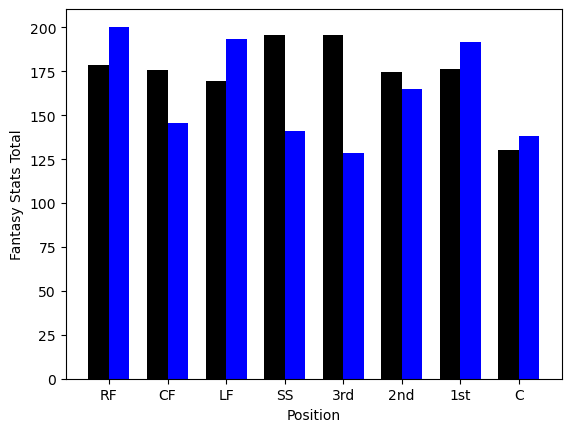

In [39]:
N = 8

positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)

#plt.figure(figuresize=(10,5))

bar_width = 0.35



plt.bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
plt.bar(ind+bar_width, nationals_positions, bar_width, color=['blue'])

plt.xlabel('Position')
plt.ylabel('Fantasy Stats Total')

plt.xticks(ind + bar_width / 2, (positions))



plt.show()

In [40]:
mets = ab_min.groupby('Tm').get_group('NYM')
mets['Pos'] = mets['Pos'].str.slice(start=0,stop=1)
mets = mets.sort_values(['Pos', 'PA'])
mets


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/1749966758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mets['Pos'] = mets['Pos'].str.slice(start=0,stop=1)


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
641,642,Tomás Nido,28,NYM,NL,98,313,284,31,68,3,28,0,0.239,0.276,2
32,33,Pete Alonso,27,NYM,NL,160,685,597,95,162,40,131,5,0.271,0.352,3
371,372,Luis Guillorme*,27,NYM,NL,102,335,297,33,81,2,17,1,0.273,0.351,4
577,578,Jeff McNeil*,30,NYM,NL,148,589,533,73,174,9,62,4,0.326,0.382,4
279,280,Eduardo Escobar#,33,NYM,NL,136,542,495,58,119,20,69,0,0.240,0.295,5
504,505,Francisco Lindor#,28,NYM,NL,161,706,630,98,170,26,107,16,0.270,0.339,6
154,155,Mark Canha,33,NYM,NL,140,542,462,71,123,13,61,3,0.266,0.367,7
642,643,Brandon Nimmo*,29,NYM,NL,151,673,580,102,159,16,64,3,0.274,0.367,8
546,547,Starling Marte,33,NYM,NL,118,505,466,76,136,16,63,18,0.292,0.347,9


In [41]:
mets.shape

(9, 16)

In [42]:
mets_rf = mets.iloc[8]['HR']+mets.iloc[8]['R']+mets.iloc[8]['RBI']+mets.iloc[8]['SB']+mets.iloc[8]['BA']*100+mets.iloc[8]['OBP']*100
mets_cf = mets.iloc[7]['HR']+mets.iloc[7]['R']+mets.iloc[7]['RBI']+mets.iloc[7]['SB']+mets.iloc[7]['BA']*100+mets.iloc[7]['OBP']*100
mets_lf = mets.iloc[6]['HR']+mets.iloc[6]['R']+mets.iloc[6]['RBI']+mets.iloc[6]['SB']+mets.iloc[6]['BA']*100+mets.iloc[6]['OBP']*100
mets_ss = mets.iloc[5]['HR']+mets.iloc[5]['R']+mets.iloc[5]['RBI']+mets.iloc[5]['SB']+mets.iloc[5]['BA']*100+mets.iloc[5]['OBP']*100
mets_third = mets.iloc[4]['HR']+mets.iloc[4]['R']+mets.iloc[4]['RBI']+mets.iloc[4]['SB']+mets.iloc[4]['BA']*100+mets.iloc[4]['OBP']*100
mets_second = mets.iloc[3]['HR']+mets.iloc[3]['R']+mets.iloc[3]['RBI']+mets.iloc[3]['SB']+mets.iloc[3]['BA']*100+mets.iloc[3]['OBP']*100
mets_first = mets.iloc[1]['HR']+mets.iloc[1]['R']+mets.iloc[1]['RBI']+mets.iloc[1]['SB']+mets.iloc[1]['BA']*100+mets.iloc[1]['OBP']*100
mets_C = mets.iloc[0]['HR']+mets.iloc[0]['R']+mets.iloc[0]['RBI']+mets.iloc[0]['SB']+mets.iloc[0]['BA']*100+mets.iloc[0]['OBP']*100

mets_positions = (mets_rf,mets_cf,mets_lf, mets_ss, mets_third, mets_second, mets_first, mets_C)

mets_positions


(236.89999999999998,
 249.10000000000002,
 211.3,
 307.9,
 200.5,
 218.8,
 333.3,
 113.5)

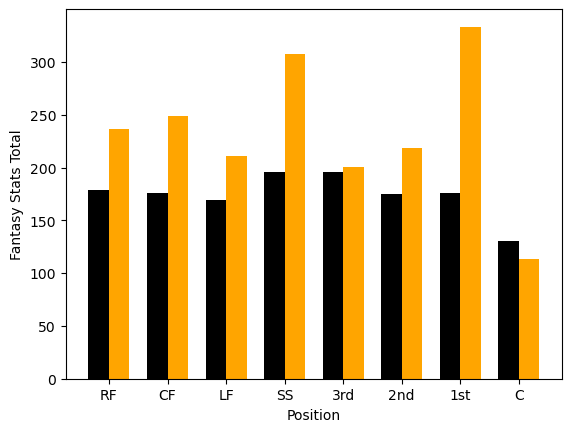

In [43]:
N = 8

positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)

#plt.figure(figuresize=(10,5))

bar_width = 0.35



plt.bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
plt.bar(ind+bar_width, mets_positions, bar_width, color=['orange'])

plt.xlabel('Position')
plt.ylabel('Fantasy Stats Total')

plt.xticks(ind + bar_width / 2, (positions))



plt.show()

In [44]:
phillies = ab_min.groupby('Tm').get_group('PHI')
phillies['Pos'] = phillies['Pos'].str.slice(start=0,stop=1)
phillies = phillies.sort_values(['Pos', 'PA'])
phillies


/var/folders/xg/0rzxdp5j3q55yjwft4mb7r6m0000gn/T/ipykernel_71655/3953863280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phillies['Pos'] = phillies['Pos'].str.slice(start=0,stop=1)


,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,HR,RBI,SB,BA,OBP,Pos
735,736,J.T. Realmuto,31,PHI,NL,139,562,504,75,139,22,84,21,0.276,0.342,2
427,428,Rhys Hoskins,29,PHI,NL,156,672,589,81,145,30,79,2,0.246,0.332,3
817,818,Jean Segura,32,PHI,NL,98,387,354,45,98,10,33,13,0.277,0.336,4
114,115,Alec Bohm,25,PHI,NL,152,631,586,79,164,13,72,2,0.280,0.315,5
869,870,Bryson Stott*,24,PHI,NL,127,466,427,58,100,10,49,12,0.234,0.295,6
813,814,Kyle Schwarber*,29,PHI,NL,155,669,577,100,126,46,94,10,0.218,0.323,7
935,936,Matt Vierling,25,PHI,NL,117,357,325,41,80,6,32,7,0.246,0.297,8
172,173,Nick Castellanos,30,PHI,NL,136,558,524,56,138,13,62,7,0.263,0.305,9
388,389,Bryce Harper*,29,PHI,NL,99,426,370,63,106,18,65,11,0.286,0.364,D


In [45]:
phillies.shape

(9, 16)

In [46]:
phillies_rf = phillies.iloc[7]['HR']+phillies.iloc[7]['R']+phillies.iloc[7]['RBI']+phillies.iloc[7]['SB']+phillies.iloc[7]['BA']*100+phillies.iloc[7]['OBP']*100
phillies_cf = phillies.iloc[6]['HR']+phillies.iloc[6]['R']+phillies.iloc[6]['RBI']+phillies.iloc[6]['SB']+phillies.iloc[6]['BA']*100+phillies.iloc[6]['OBP']*100
phillies_lf = phillies.iloc[5]['HR']+phillies.iloc[5]['R']+phillies.iloc[5]['RBI']+phillies.iloc[5]['SB']+phillies.iloc[5]['BA']*100+phillies.iloc[5]['OBP']*100
phillies_ss = phillies.iloc[4]['HR']+phillies.iloc[4]['R']+phillies.iloc[4]['RBI']+phillies.iloc[4]['SB']+phillies.iloc[4]['BA']*100+phillies.iloc[4]['OBP']*100
phillies_third = phillies.iloc[3]['HR']+phillies.iloc[3]['R']+phillies.iloc[3]['RBI']+phillies.iloc[3]['SB']+phillies.iloc[3]['BA']*100+phillies.iloc[3]['OBP']*100
phillies_second = phillies.iloc[2]['HR']+phillies.iloc[2]['R']+phillies.iloc[2]['RBI']+phillies.iloc[2]['SB']+phillies.iloc[2]['BA']*100+phillies.iloc[2]['OBP']*100
phillies_first = phillies.iloc[1]['HR']+phillies.iloc[1]['R']+phillies.iloc[1]['RBI']+phillies.iloc[1]['SB']+phillies.iloc[1]['BA']*100+phillies.iloc[1]['OBP']*100
phillies_C = phillies.iloc[0]['HR']+phillies.iloc[0]['R']+phillies.iloc[0]['RBI']+phillies.iloc[0]['SB']+phillies.iloc[0]['BA']*100+phillies.iloc[0]['OBP']*100

phillies_positions = (phillies_rf,phillies_cf,phillies_lf, phillies_ss, phillies_third, phillies_second, phillies_first, phillies_C)

phillies_positions


(194.8,
 140.29999999999998,
 304.1,
 181.9,
 225.5,
 162.29999999999998,
 249.8,
 263.8)

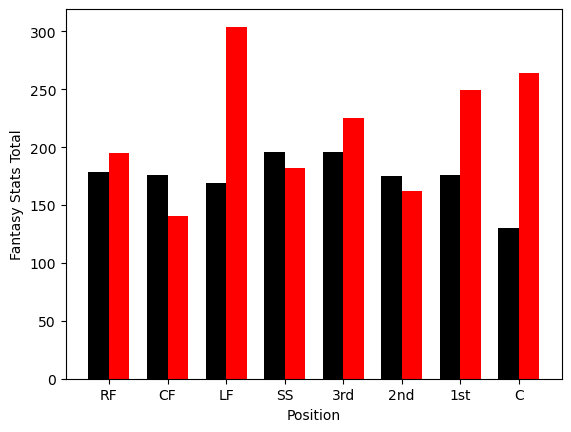

In [47]:
N = 8

positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)

#plt.figure(figuresize=(10,5))

bar_width = 0.35



plt.bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
plt.bar(ind+bar_width, phillies_positions, bar_width, color=['red'])

plt.xlabel('Position')
plt.ylabel('Fantasy Stats Total')

plt.xticks(ind + bar_width / 2, (positions))



plt.show()

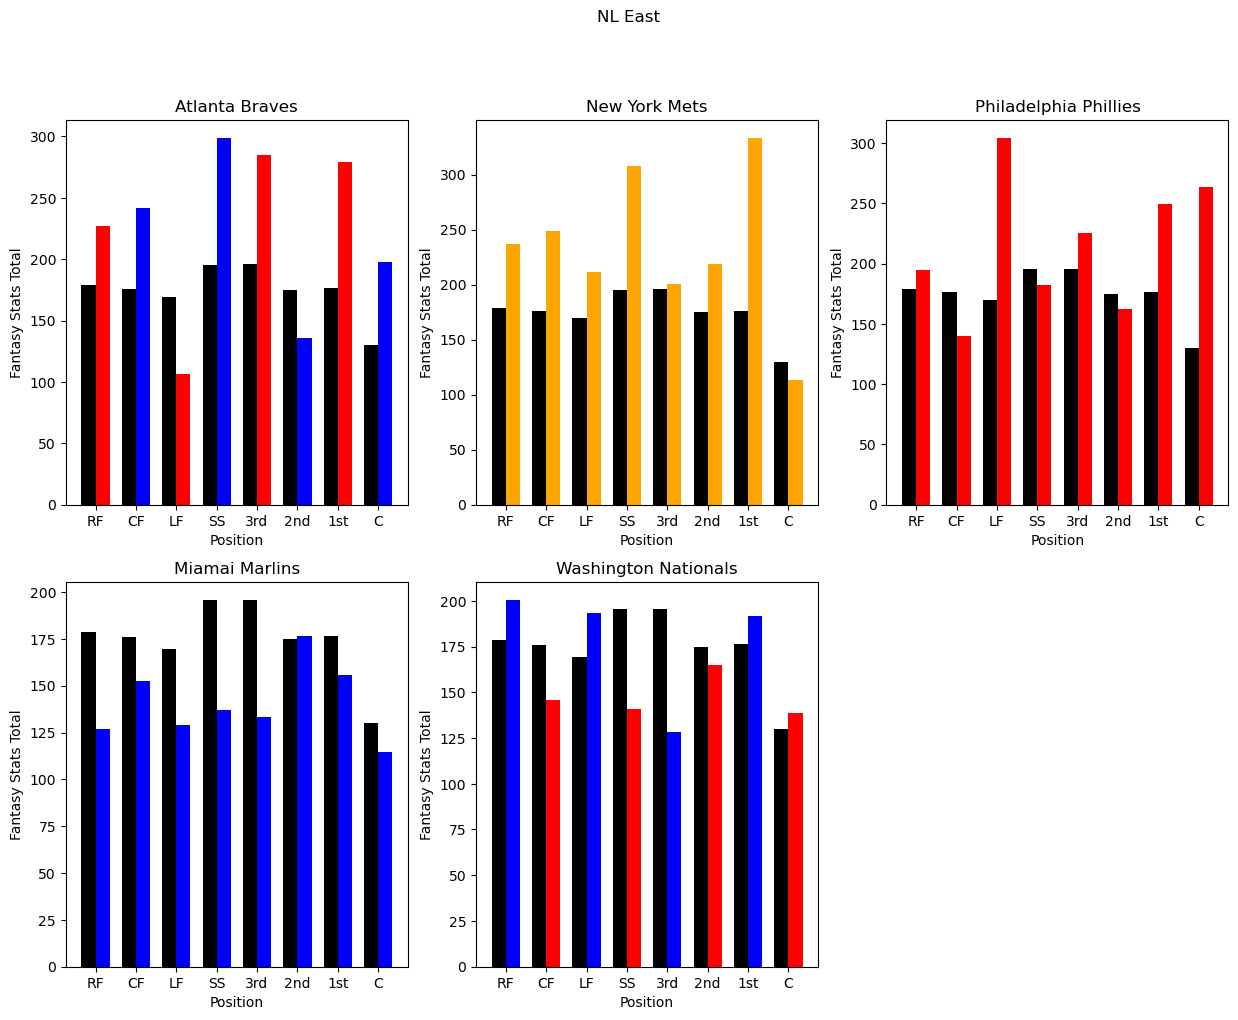

In [48]:
# create a 3X2 graph to hold all teams in the NL East to easily compare them

N = 8

positions = ['RF','CF','LF','SS','3rd','2nd','1st','C']

ind = np.arange(N)

#plt.figure(figuresize=(10,5))

bar_width = 0.35

colors = ['red','blue','red','blue','red','blue','red','blue']

fig, axs = plt.subplots(2,3, figsize=(15,11))
# creat first subplot for the braves
axs[0,0].bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
# player bar
axs[0,0].bar(ind+bar_width, braves_positions, bar_width, color=colors)
#create labels
axs[0,0].set_xlabel('Position')
axs[0,0].set_ylabel('Fantasy Stats Total')
axs[0,0].set_xticks(ind + bar_width / 2, (positions))
axs[0,0].set_title('Atlanta Braves')

axs[0,1].bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
axs[0,1].bar(ind+bar_width, mets_positions, bar_width, color=['orange'])
axs[0,1].set_xlabel('Position')
axs[0,1].set_ylabel('Fantasy Stats Total')
axs[0,1].set_xticks(ind + bar_width / 2, (positions))
axs[0,1].set_title('New York Mets')

axs[0,2].bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
axs[0,2].bar(ind+bar_width, phillies_positions, bar_width, color=['red'])
axs[0,2].set_xlabel('Position')
axs[0,2].set_ylabel('Fantasy Stats Total')
axs[0,2].set_xticks(ind + bar_width / 2, (positions))
axs[0,2].set_title('Philadelphia Phillies')

axs[1,0].bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
axs[1,0].bar(ind+bar_width, marlins_positions, bar_width, color=['blue'])
axs[1,0].set_xlabel('Position')
axs[1,0].set_ylabel('Fantasy Stats Total')
axs[1,0].set_xticks(ind + bar_width / 2, (positions))
axs[1,0].set_title('Miamai Marlins')

# change colors for nationals for differentiation purposes
colors_nationals = ('blue','red','blue', 'red','blue','red','blue', 'red')

axs[1,1].bar(ind, ab_min_avg_total_all, bar_width, color=['black'])
axs[1,1].bar(ind+bar_width, nationals_positions, bar_width, color=colors_nationals)
axs[1,1].set_xlabel('Position')
axs[1,1].set_ylabel('Fantasy Stats Total')
axs[1,1].set_xticks(ind + bar_width / 2, (positions))
axs[1,1].set_title('Washington Nationals')

# delete the last plot since their are only five teams
fig.delaxes(axs[1,2])

# title for the entire plot
fig.suptitle('NL East')

plt.show()

Observations: The graphs above are sorted by record from best to worst, or the standings to end the 2022 season in the NL East. All too often fantasy focuses on individual accomplishments, but in order to be awarded an RBI your teammate must get on base. Conversley, in order to be awarded a run your teammate must bat you in. I think it would be benefical to look at how much better each position performs when compared to their average counterpart. Not only would this give you an idea of how each position performed individually, but how well they will continue to perform based on the teammates around them. It is not surprising that the two teams with the same record (Braves were awarded the tie breaker for a head-to-head better record) had more players perform better than the average. Visually you can see that their players peformed better as the colored bars which represents the players on the team are much higher than the average represented by the black bars. 

In [49]:
# subtract the average from each teams position total
braves_minus_average = tuple(x - y for x, y in zip(braves_positions, ab_min_avg_total_all))
mets_minus_average = tuple(x - y for x, y in zip(mets_positions, ab_min_avg_total_all))
phillies_minus_average = tuple(x - y for x, y in zip(phillies_positions, ab_min_avg_total_all))
marlins_minus_average = tuple(x - y for x, y in zip(marlins_positions, ab_min_avg_total_all))
nationals_minus_average = tuple(x - y for x, y in zip(nationals_positions, ab_min_avg_total_all))

redsox_minus_average = tuple(x - y for x, y in zip(redsox_positions, ab_min_avg_total_all))


Below shows a sum of the difference of the average player and each team's players in 2022. If one was predicting the standings based on this you might think that the Mets would be first, and Marlins last, but other than that it does an okay job. Of course this is ommitting one major determinant of baseball games, pitching. 

In [50]:
sum(braves_minus_average)

374.9718196761728

In [51]:
sum(mets_minus_average)

474.77181967617287

In [52]:
sum(phillies_minus_average)

325.9718196761728

In [53]:
sum(marlins_minus_average)

-270.82818032382727

In [54]:
sum(nationals_minus_average)

-93.02818032382723

Curious to see how the Redsox stacked up.

In [55]:
sum(redsox_minus_average)

-37.82818032382718